# Loading the data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = "1.5k Data Set 5"
# Read the CSV file
df = pd.read_csv(f"data/raw/{file_name}.csv", encoding="utf-8")

# df.drop(columns=["market_cap_usd", "volume"], inplace=True)

print("\nShape of the dataset:")
print(df.shape)


Shape of the dataset:
(64018, 17)


## Cleaning to not have any empty values

In [4]:
# Drop rows with any empty values (NaN)
# df["growth"] = df["growth"].fillna(0.0)
df["dividend"] = df["dividend"].fillna(0.0)

df_no_nan = df.dropna()
print(df_no_nan.shape)
# Calculate number of dropped rows
dropped_rows = df.shape[0] - df_no_nan.shape[0]
print(f"\nNumber of rows dropped: {dropped_rows}")
print(f"Percentage of data mantained: {(df_no_nan.shape[0]/df.shape[0]*100):.2f}%")

# Display info about which columns had missing values
print("\nMissing values by column before cleaning:")
missing_values = df.isnull().sum()
missing_values = missing_values[
    missing_values > 0
]  # Only show columns with missing values
missing_percentages = (missing_values / len(df) * 100).round(2)
print("\nMissing values and percentages by column:")
for col in missing_values.index:
    print(f"{col}: {missing_values[col]} values ({missing_percentages[col]}%)")

(27130, 17)

Number of rows dropped: 36888
Percentage of data mantained: 42.38%

Missing values by column before cleaning:

Missing values and percentages by column:
quality: 6659 values (10.4%)
growth: 33836 values (52.85%)
value: 4809 values (7.51%)
market_cap_usd: 222 values (0.35%)
volume: 222 values (0.35%)
profit_1m: 1413 values (2.21%)
profit_3m: 1720 values (2.69%)
profit_6m: 1854 values (2.9%)
profit_1y: 1918 values (3.0%)
profit_2y: 1971 values (3.08%)
profit_5y: 3386 values (5.29%)


# Analyzing

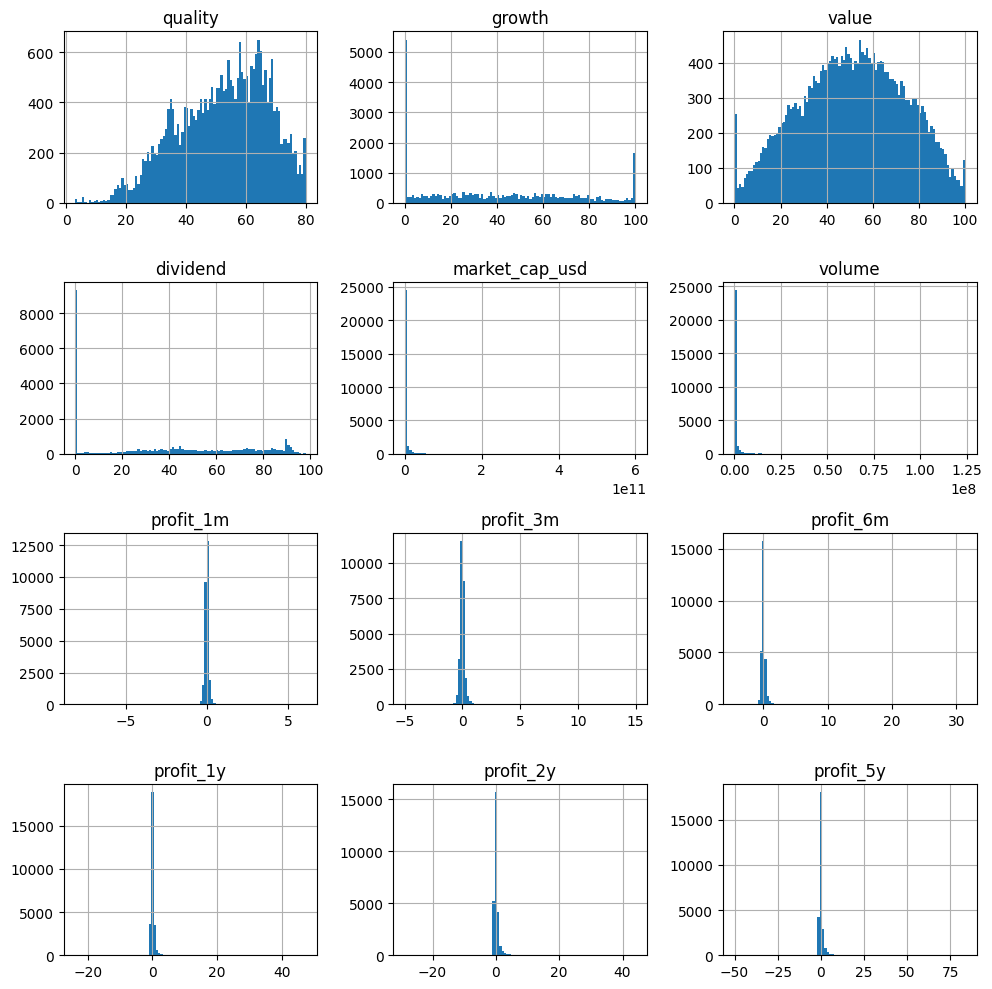

<Figure size 1920x1440 with 0 Axes>

In [5]:
# distribution of the data
df_no_nan.hist(figsize=(10, 10), bins=100)
plt.tight_layout()  # Adjust spacing between subplots
plt.show(block=False)  # Show plot without blocking
plt.gcf().set_dpi(300)  # Increase DPI for higher resolution


# Create a normalized version of the dataframe
# Select only numeric columns
numeric_columns = df_no_nan.select_dtypes(include=["float64", "int64"]).columns

# Normalize only numeric columns
df_normalized = df_no_nan.copy()
for column in numeric_columns:
    df_normalized[column] = (
        2
        * (
            (df_no_nan[column] - df_no_nan[column].min())
            / (df_no_nan[column].max() - df_no_nan[column].min())
        )
        - 1
    )

### Deeper plots

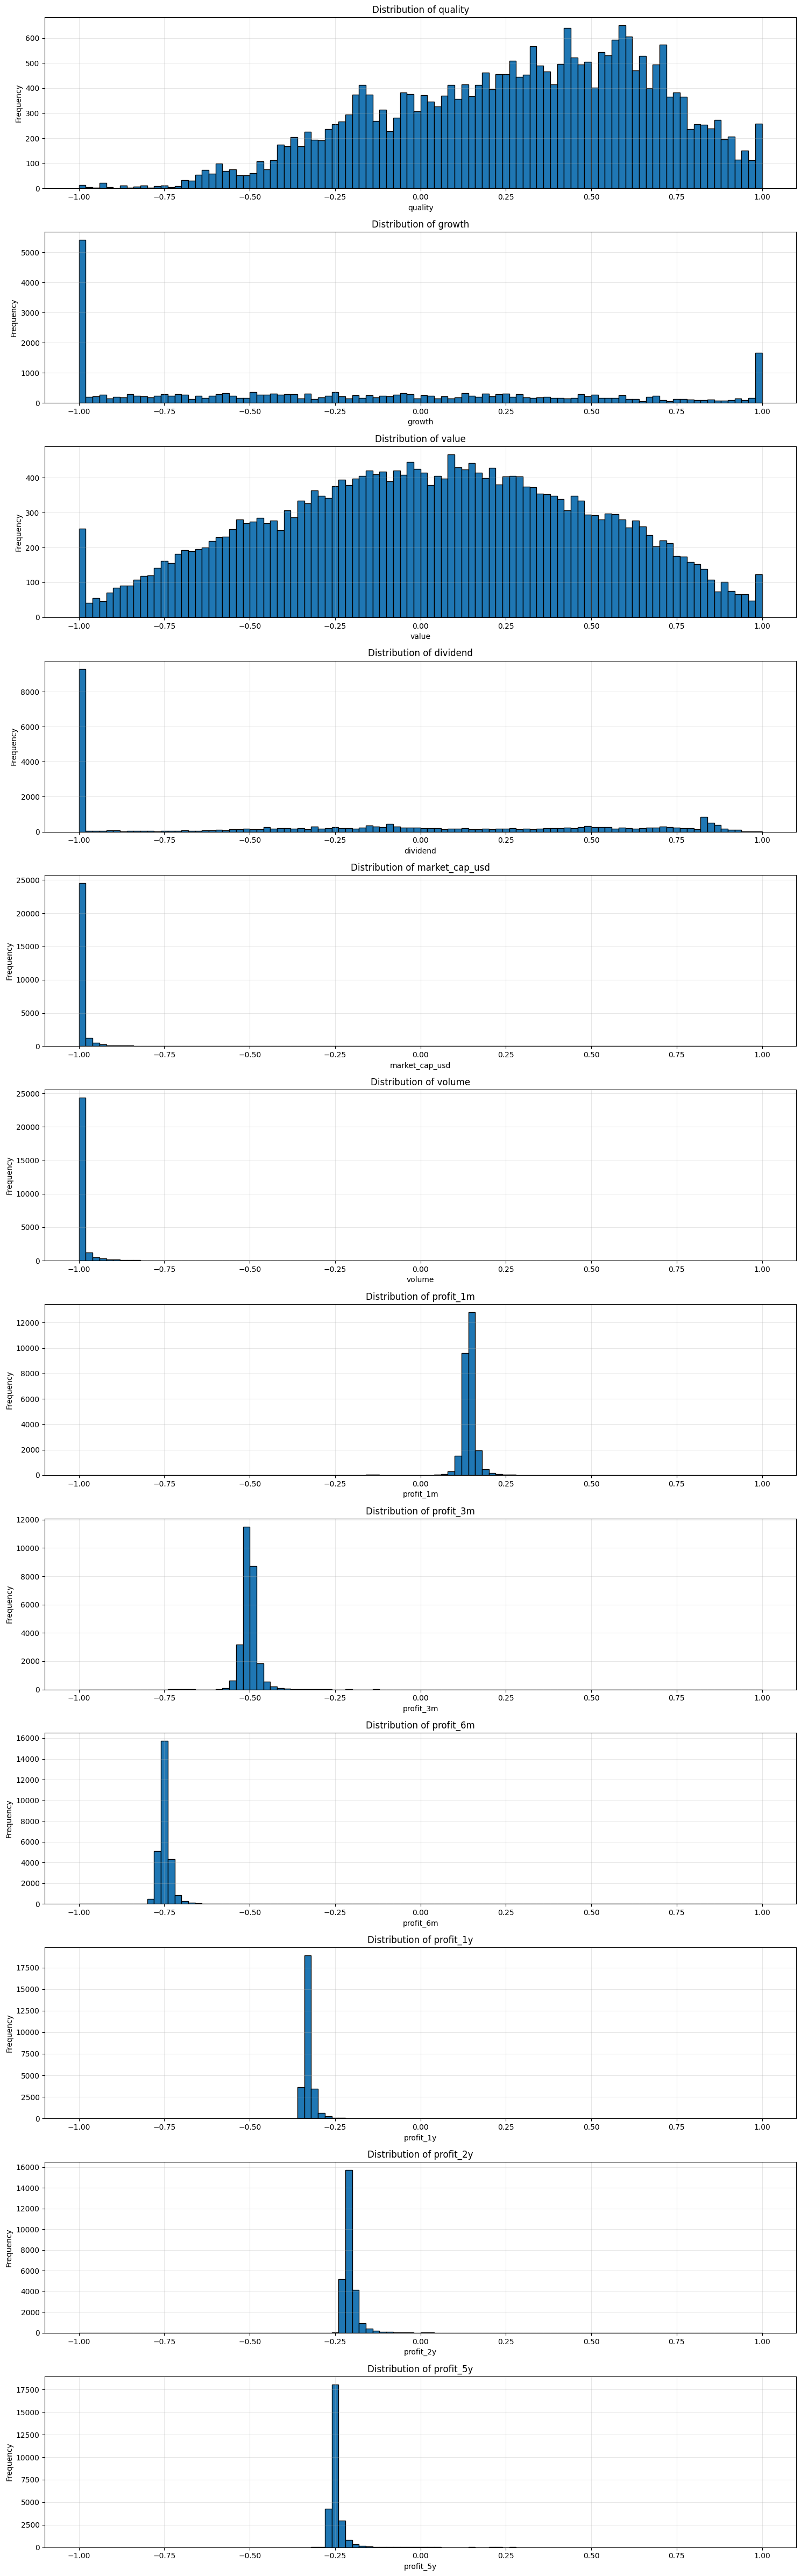

In [6]:
# Create individual histograms for each numeric column
plt.figure(
    figsize=(15, len(numeric_columns) * 4)
)  # Adjust figure size based on number of columns

for idx, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, idx)
    plt.hist(df_normalized[column], bins=100, edgecolor="black")
    # plt.hist(df[column], bins=100, edgecolor="black") # Note: change this for original data

    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Excluding outliers

Number of outliers removed: 1636
Percentage of data mantained: 39.82%
(25494, 17)


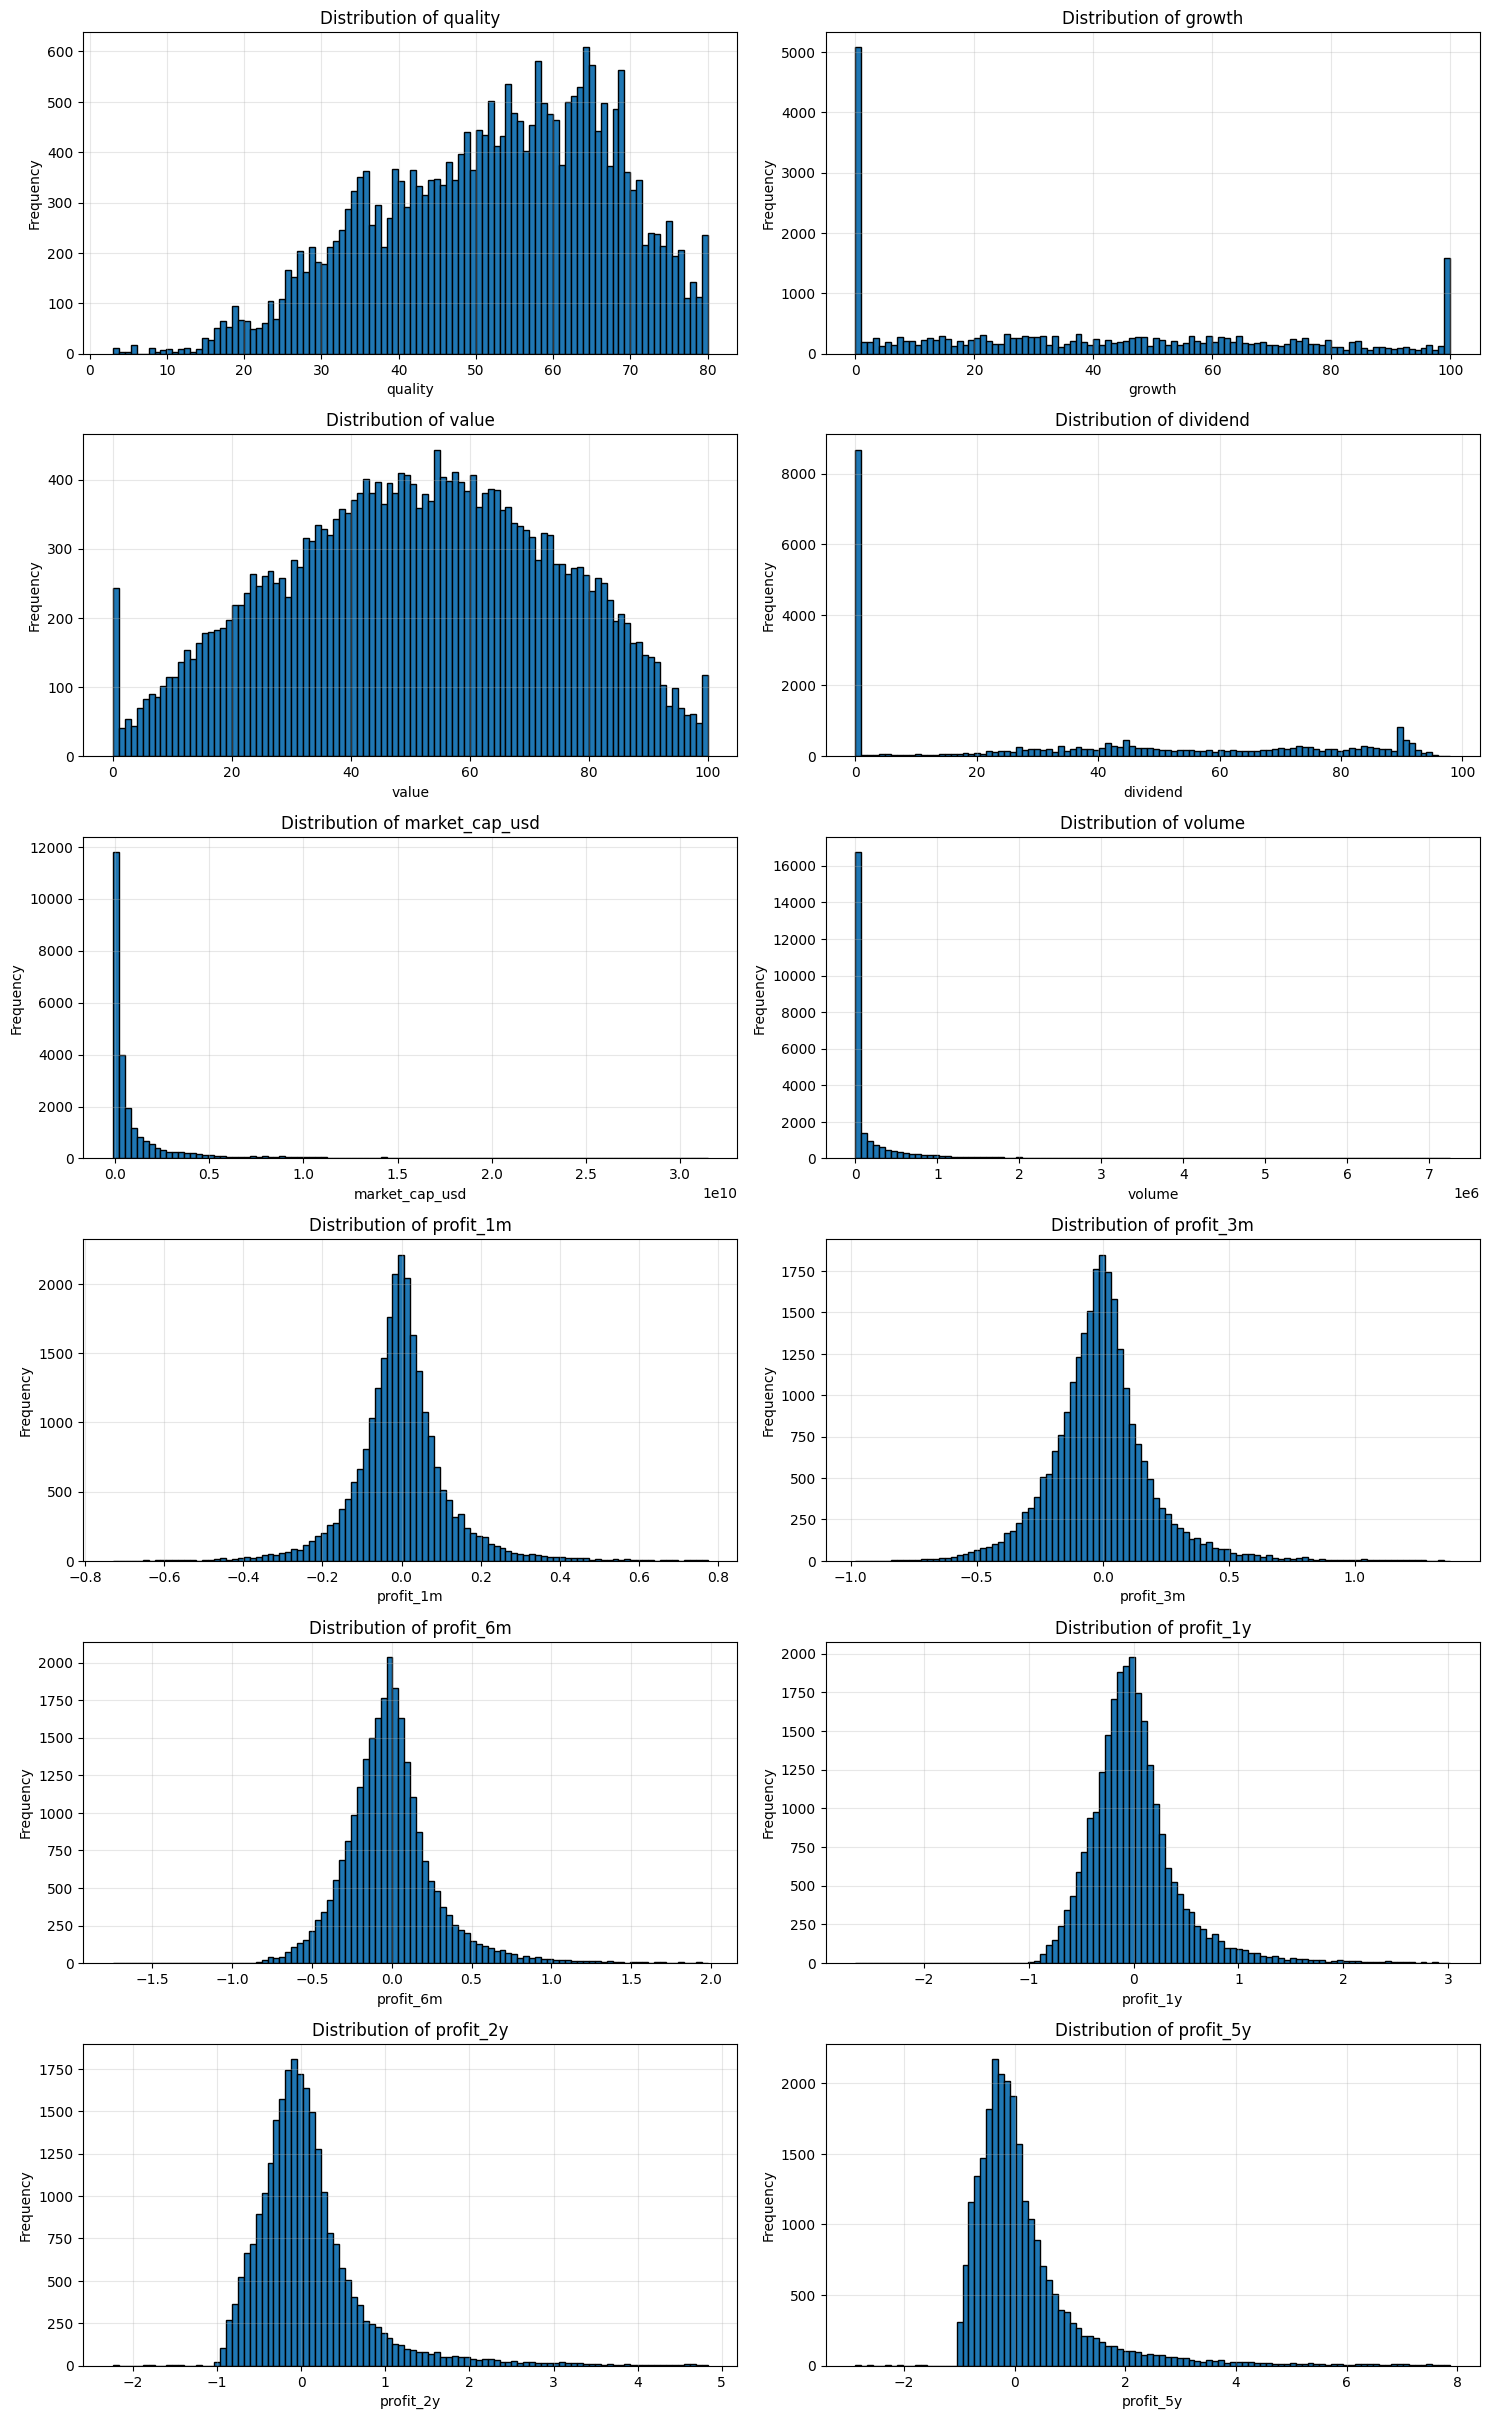

In [7]:
# Calculate Q1, Q3, and IQR for market cap and profits
tolerance = 0.05  # % of outliers to exclude

# market cap
Q1_market_cap = df_no_nan["market_cap_usd"].quantile(tolerance)
Q3_market_cap = df_no_nan["market_cap_usd"].quantile(1 - tolerance)
IQR_market_cap = Q3_market_cap - Q1_market_cap

# volume
Q1_volume = df_no_nan["volume"].quantile(tolerance)
Q3_volume = df_no_nan["volume"].quantile(1 - tolerance)
IQR_volume = Q3_volume - Q1_volume

# Profits

Q1_profit_1m = df_no_nan["profit_1m"].quantile(tolerance)
Q1_profit_3m = df_no_nan["profit_3m"].quantile(tolerance)
Q1_profit_6m = df_no_nan["profit_6m"].quantile(tolerance)
Q1_profit_1y = df_no_nan["profit_1y"].quantile(tolerance)
Q1_profit_2y = df_no_nan["profit_2y"].quantile(tolerance)
Q1_profit_5y = df_no_nan["profit_5y"].quantile(tolerance)

Q3_profit_1m = df_no_nan["profit_1m"].quantile(1 - tolerance)
Q3_profit_3m = df_no_nan["profit_3m"].quantile(1 - tolerance)
Q3_profit_6m = df_no_nan["profit_6m"].quantile(1 - tolerance)
Q3_profit_1y = df_no_nan["profit_1y"].quantile(1 - tolerance)
Q3_profit_2y = df_no_nan["profit_2y"].quantile(1 - tolerance)
Q3_profit_5y = df_no_nan["profit_5y"].quantile(1 - tolerance)


# Define bounds for outliers (using 1.5 * IQR rule)

lower_bound_market_cap = Q1_market_cap - 1.5 * IQR_market_cap
upper_bound_market_cap = Q3_market_cap + 1.5 * IQR_market_cap

lower_bound_volume = Q1_volume - 1.5 * IQR_volume
upper_bound_volume = Q3_volume + 1.5 * IQR_volume


lower_bound_profit_1m = Q1_profit_1m - 1.5 * (Q3_profit_1m - Q1_profit_1m)
lower_bound_profit_3m = Q1_profit_3m - 1.5 * (Q3_profit_3m - Q1_profit_3m)
lower_bound_profit_6m = Q1_profit_6m - 1.5 * (Q3_profit_6m - Q1_profit_6m)
lower_bound_profit_1y = Q1_profit_1y - 1.5 * (Q3_profit_1y - Q1_profit_1y)
lower_bound_profit_2y = Q1_profit_2y - 1.5 * (Q3_profit_2y - Q1_profit_2y)
lower_bound_profit_5y = Q1_profit_5y - 1.5 * (Q3_profit_5y - Q1_profit_5y)

upper_bound_profit_1m = Q3_profit_1m + 1.5 * (Q3_profit_1m - Q1_profit_1m)
upper_bound_profit_3m = Q3_profit_3m + 1.5 * (Q3_profit_3m - Q1_profit_3m)
upper_bound_profit_6m = Q3_profit_6m + 1.5 * (Q3_profit_6m - Q1_profit_6m)
upper_bound_profit_1y = Q3_profit_1y + 1.5 * (Q3_profit_1y - Q1_profit_1y)
upper_bound_profit_2y = Q3_profit_2y + 1.5 * (Q3_profit_2y - Q1_profit_2y)
upper_bound_profit_5y = Q3_profit_5y + 1.5 * (Q3_profit_5y - Q1_profit_5y)


# Create a new dataframe excluding outliers
df_no_outliers = df_no_nan[
    (df_no_nan["profit_1m"] >= lower_bound_profit_1m)
    & (df_no_nan["profit_1m"] <= upper_bound_profit_1m)
    & (df_no_nan["profit_3m"] >= lower_bound_profit_3m)
    & (df_no_nan["profit_3m"] <= upper_bound_profit_3m)
    & (df_no_nan["profit_6m"] >= lower_bound_profit_6m)
    & (df_no_nan["profit_6m"] <= upper_bound_profit_6m)
    & (df_no_nan["profit_1y"] >= lower_bound_profit_1y)
    & (df_no_nan["profit_1y"] <= upper_bound_profit_1y)
    & (df_no_nan["profit_2y"] >= lower_bound_profit_2y)
    & (df_no_nan["profit_2y"] <= upper_bound_profit_2y)
    & (df_no_nan["profit_5y"] >= lower_bound_profit_5y)
    & (df_no_nan["profit_5y"] <= upper_bound_profit_5y)
    # & (df["growth"] != 0)
    # & (df["growth"] != 100)
    # & (df["value"] != 0)
    # & (df["value"] != 100)
    & (df_no_nan["market_cap_usd"] >= lower_bound_market_cap)
    & (df_no_nan["market_cap_usd"] <= upper_bound_market_cap)
    & (df_no_nan["volume"] >= lower_bound_volume)
    & (df_no_nan["volume"] <= upper_bound_volume)
]


print(f"Number of outliers removed: {df_no_nan.shape[0] - df_no_outliers.shape[0]}")
print(f"Percentage of data mantained: {(df_no_outliers.shape[0]/df.shape[0]*100):.2f}%")
print(df_no_outliers.shape)

# New histograms to check the outliers
# Create histograms for each numeric column in the cleaned dataset
plt.figure(figsize=(15, len(numeric_columns) * 4))

for idx, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 2, idx)
    plt.hist(df_no_outliers[column], bins=100, edgecolor="black")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)

plt.tight_layout()

# Recap

Data Retention:
Original records: 64,018
Cleaned records: 25,494
Retention rate: 39.82%

Comparison of key statistics:

quality:
Original mean: 48.91
Cleaned mean: 52.53
Original std: 17.48
Cleaned std: 14.88

growth:
Original mean: 39.09
Cleaned mean: 39.45
Original std: 32.83
Cleaned std: 32.58

value:
Original mean: 49.51
Cleaned mean: 51.16
Original std: 23.22
Cleaned std: 22.78

dividend:
Original mean: 32.81
Cleaned mean: 37.81
Original std: 35.28
Cleaned std: 33.50

market_cap_usd:
Original mean: 2,323,675,514.54
Cleaned mean: 1,689,060,337.84
Original std: 15,302,212,708.10
Cleaned std: 3,883,228,779.42

volume:
Original mean: 549,707.94
Cleaned mean: 337,551.56
Original std: 3,084,165.26
Cleaned std: 871,699.49

profit_1m:
Original mean: 0.03
Cleaned mean: -0.00
Original std: 2.80
Cleaned std: 0.12

profit_3m:
Original mean: 0.05
Cleaned mean: -0.01
Original std: 2.00
Cleaned std: 0.21

profit_6m:
Original mean: 0.07
Cleaned mean: -0.01
Original std: 1.89
Cleaned std: 0.29

pr

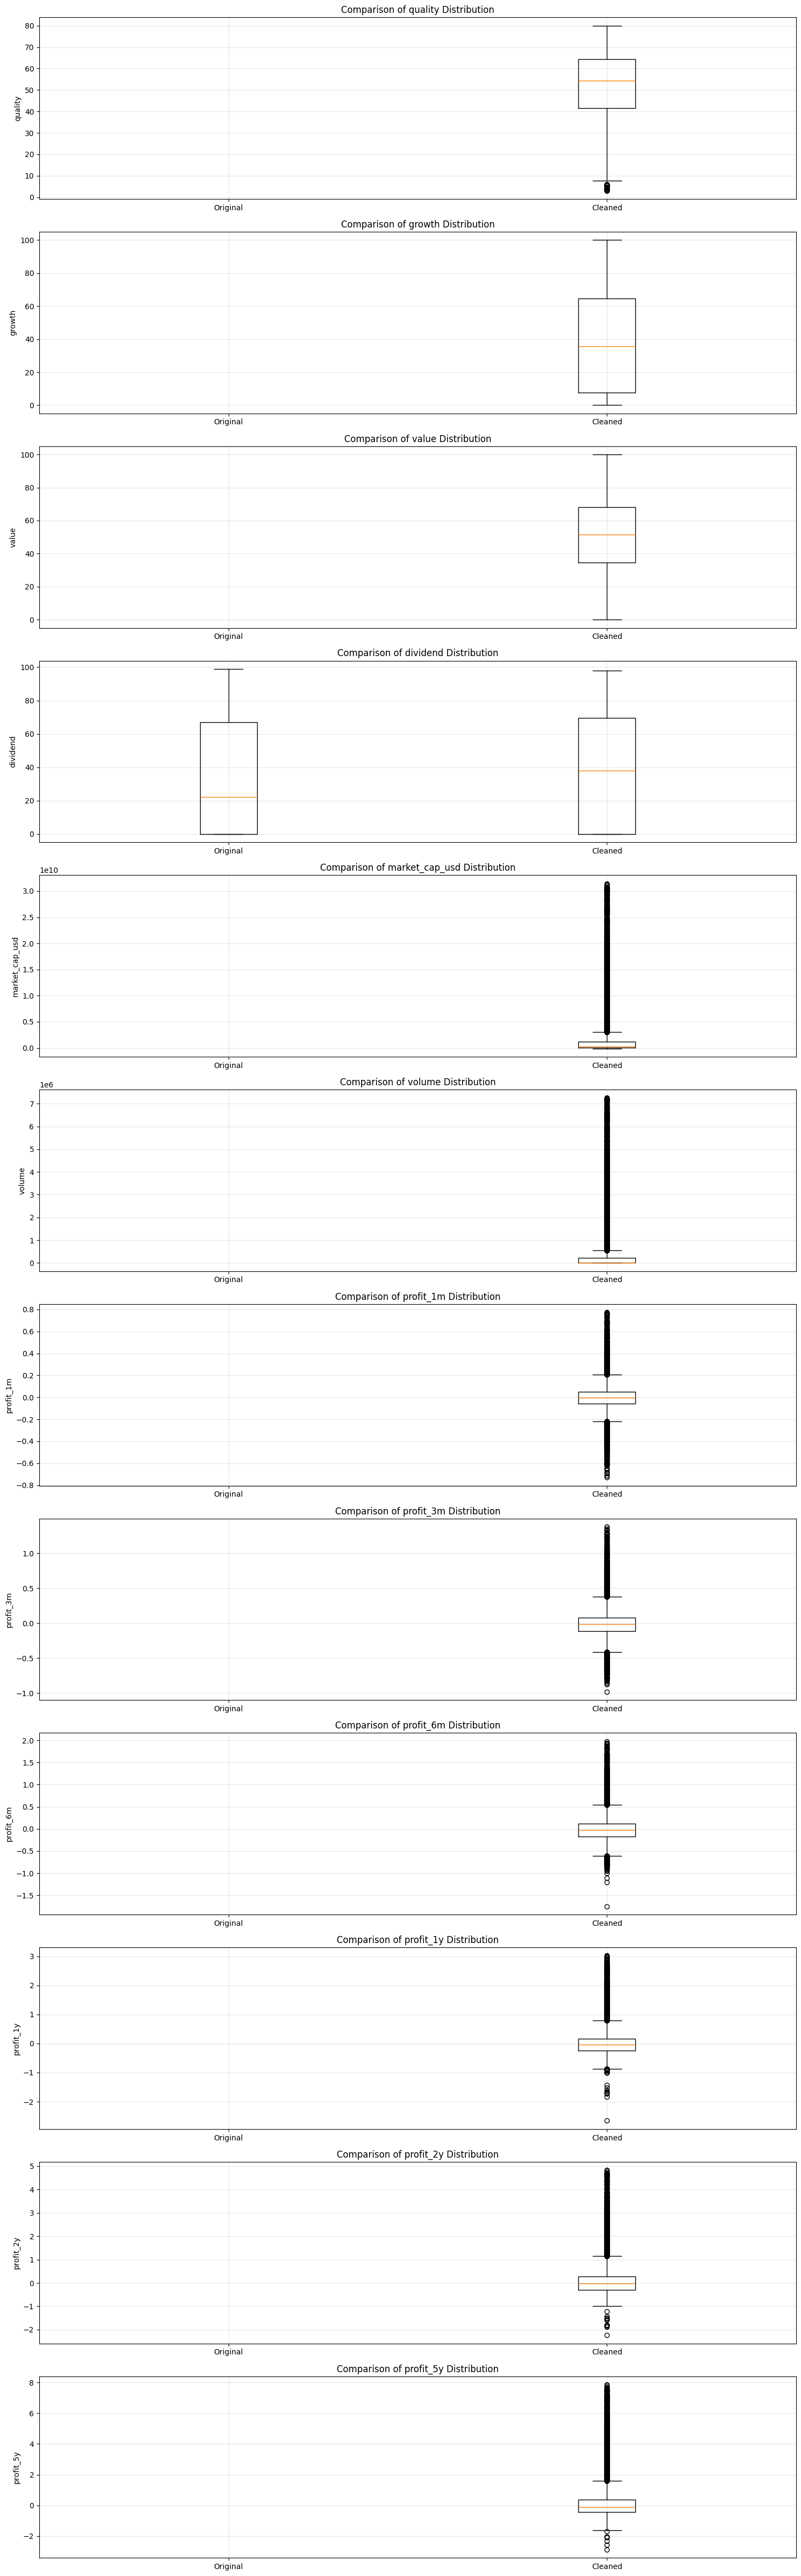

In [8]:
# Now compare the original and the cleaned data
# Create a new dataframe with the original data
df_original = df.copy()

# Create a new dataframe with the cleaned data
df_cleaned = df_no_outliers.copy()

# Calculate basic statistics for both datasets
original_stats = df_original.describe()
cleaned_stats = df_cleaned.describe()

# Calculate the percentage of data retained
retention_rate = (len(df_cleaned) / len(df_original)) * 100

print("Data Retention:")
print(f"Original records: {len(df_original):,}")
print(f"Cleaned records: {len(df_cleaned):,}")
print(f"Retention rate: {retention_rate:.2f}%\n")

# Compare means and standard deviations
print("Comparison of key statistics:")
for column in numeric_columns:
    print(f"\n{column}:")
    print(f"Original mean: {df_original[column].mean():,.2f}")
    print(f"Cleaned mean: {df_cleaned[column].mean():,.2f}")
    print(f"Original std: {df_original[column].std():,.2f}")
    print(f"Cleaned std: {df_cleaned[column].std():,.2f}")

# Create side-by-side box plots for visual comparison
plt.figure(figsize=(15, len(numeric_columns) * 4))

for idx, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, idx)

    # Create box plots
    box_data = [df_original[column], df_cleaned[column]]
    plt.boxplot(box_data, tick_labels=["Original", "Cleaned"])

    plt.title(f"Comparison of {column} Distribution")
    plt.ylabel(column)
    plt.grid(True, alpha=0.3)

plt.tight_layout()

# Export cleaned data

In [9]:
# Export the cleaned dataset to CSV
cleaned_data_path = f"data/cleaned/{file_name}_cleaned.csv"
df_cleaned.to_csv(cleaned_data_path, index=False)

print(f"Cleaned data exported to: {cleaned_data_path}")

Cleaned data exported to: data/cleaned/1.5k Data Set 5_cleaned.csv
